In [51]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
df = pd.read_csv('Online Retail Data Set.csv', encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [53]:
# Преобразование столбца InvoiceDate в формат даты
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%d-%m-%Y %H:%M")
# Добавление столбцов "Year" и "Month"
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
# Добавление столбца с месяцем и годом
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
# Создание дополнительного столбца с суммой покупки
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Расчет динамики продаж по месяцам

In [43]:
# Группировка данных по месяцам и годам и подсчет общей суммы покупок
monthly_sales = df.groupby(['Year', 'Month'])['UnitPrice'].sum().reset_index()

print(monthly_sales)

    Year  Month   UnitPrice
0   2010     12  260520.850
1   2011      1  172752.800
2   2011      2  127448.770
3   2011      3  171486.510
4   2011      4  129164.961
5   2011      5  190685.460
6   2011      6  200717.340
7   2011      7  171906.791
8   2011      8  150385.680
9   2011      9  199235.212
10  2011     10  263434.090
11  2011     11  327149.850
12  2011     12  133915.660


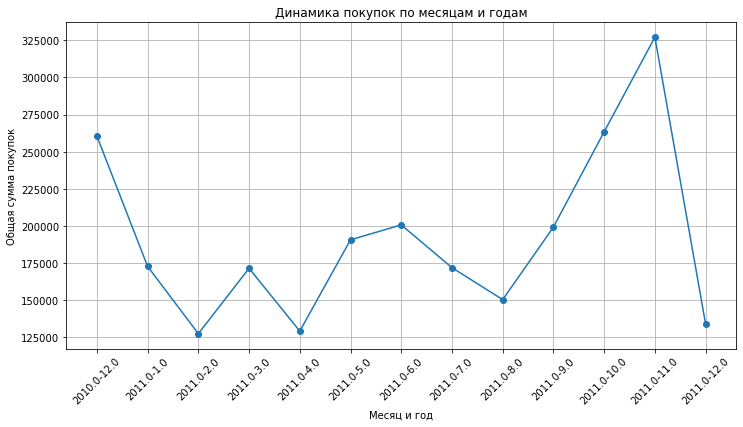

In [6]:
# Создание графика
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['UnitPrice'], marker='o')
plt.xticks(range(len(monthly_sales)), [f"{row['Year']}-{row['Month']}" for index, row in monthly_sales.iterrows()], rotation=45)
plt.xlabel('Месяц и год')
plt.ylabel('Общая сумма покупок')
plt.title('Динамика покупок по месяцам и годам')
plt.grid(True)
plt.show()

Мы построили график динамики покупок за период с декабря 2010 года по декабрь 2012 года. Мы наблюдаем пиковые значения продаж в следующие периоды времени: декабрь 10 года, июнь и декабрь 11 года. Падение продаж было в феврале, апреле и августе 11 года, что обусловлено сезонными факторами, связанными с товарными категориями.

# Суммы покупок по каждой стране за все время:

In [6]:
# Создание таблицы продаж по стране покупателя
sales_by_country = df.groupby('Country').sum()['UnitPrice']

print(sales_by_country)

Country
Australia                  4054.750
Austria                    1701.520
Bahrain                      86.570
Belgium                    7540.130
Brazil                      142.600
Canada                      910.580
Channel Islands            3738.550
Cyprus                     3920.070
Czech Republic               88.150
Denmark                    1266.950
EIRE                      48447.190
European Community          294.050
Finland                    3786.850
France                    43031.990
Germany                   37666.000
Greece                      713.290
Hong Kong                 12241.500
Iceland                     481.210
Israel                     1079.040
Italy                      3879.390
Japan                       814.860
Lebanon                     242.440
Lithuania                    99.440
Malta                       666.010
Netherlands                6492.550
Norway                     6529.060
Poland                     1422.270
Portugal            

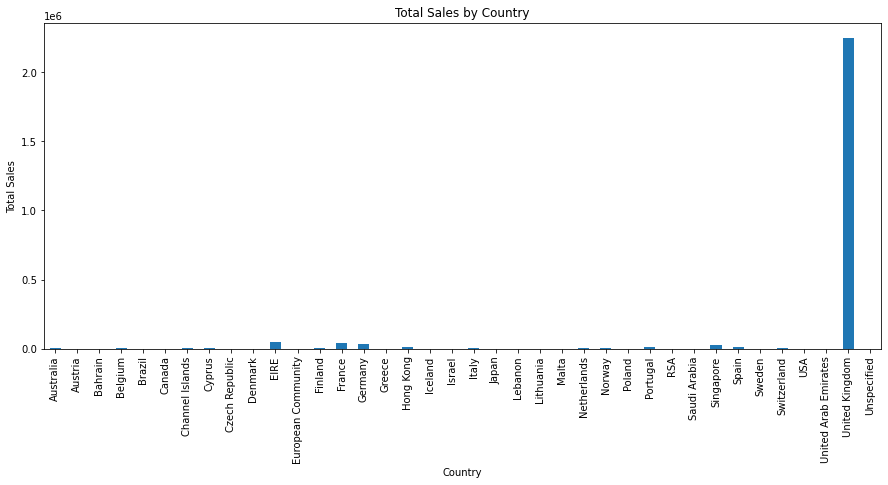

In [7]:
# Создание графика
sales_by_country.plot(kind="bar", figsize=(15, 6))
plt.title("Total Sales by Country")
plt.ylabel("Total Sales")
plt.show()

Топ-продаж делают европейские страны (особенно Великобритания), а также некоторые азиатские страны: Гонконг, Сингапур. 

# Cуммы покупок по каждой стране за каждый месяц года отдельно:

In [45]:
# Создание таблицы продаж по стране покупателя по месяцам и годам
sales_by_country_month_year = df.groupby(['Country', df['InvoiceDate'].dt.to_period('M')]).sum()['UnitPrice']

print(sales_by_country_month_year)

Country      InvoiceDate
Australia    2010-12        143.66
             2011-01        338.94
             2011-02        273.63
             2011-03        372.57
             2011-04        396.55
                             ...  
Unspecified  2011-06         42.10
             2011-07        627.05
             2011-08        146.51
             2011-09        108.43
             2011-11        116.10
Name: UnitPrice, Length: 314, dtype: float64


In [47]:
# Группировка данных по странам и месяцам и суммирование продаж
sales_by_country_month = df.groupby(["Country", "Month"])["UnitPrice"].sum().unstack()

print(sales_by_country_month)

Month                        1          2          3           4          5   \
Country                                                                        
Australia                338.94     273.63     372.57     396.550     382.87   
Austria                     NaN     110.61     142.86     163.180     223.58   
Bahrain                    3.81        NaN        NaN         NaN      78.95   
Belgium                  225.83     467.51     641.33     388.810     504.96   
Brazil                      NaN        NaN        NaN     142.600        NaN   
Canada                      NaN        NaN      20.63         NaN       1.06   
Channel Islands          198.73      26.22     603.20      78.100     811.35   
Cyprus                   292.01    1701.64     121.19      17.900        NaN   
Czech Republic              NaN      28.89        NaN       2.940        NaN   
Denmark                     NaN      63.93     122.21         NaN      50.66   
EIRE                     854.61    1643.

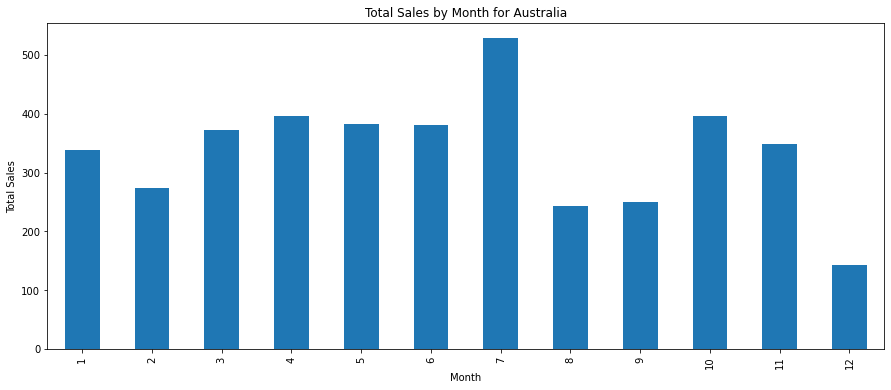

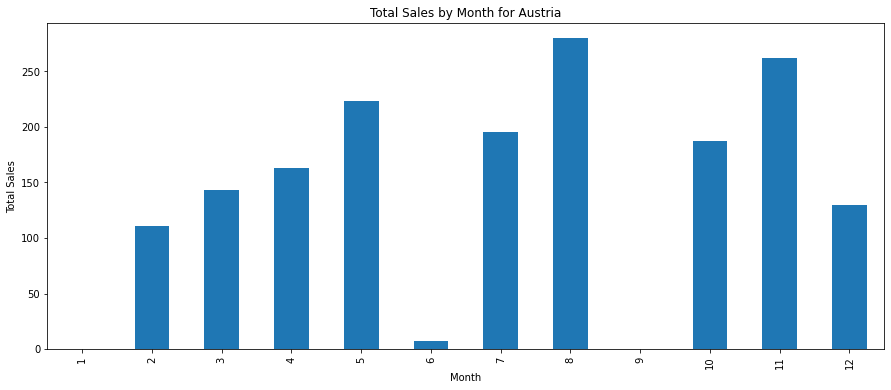

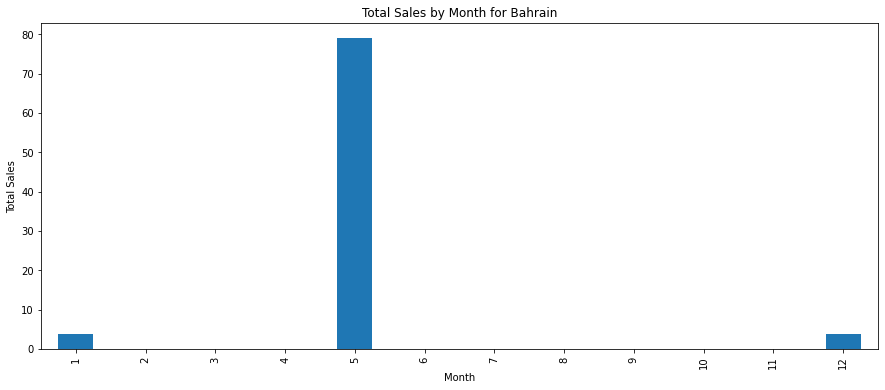

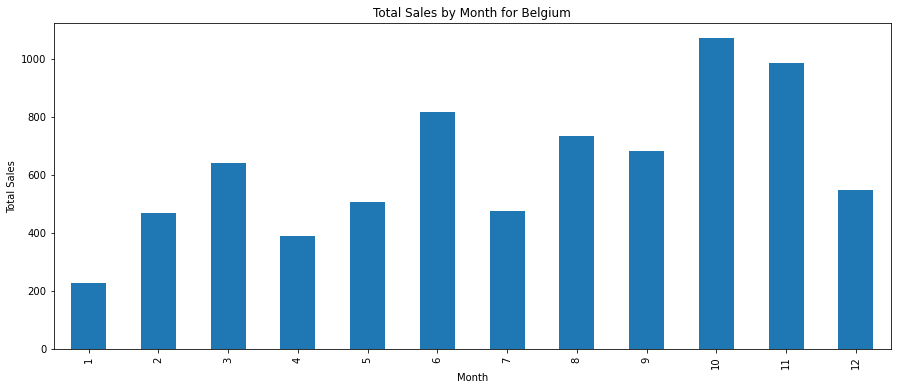

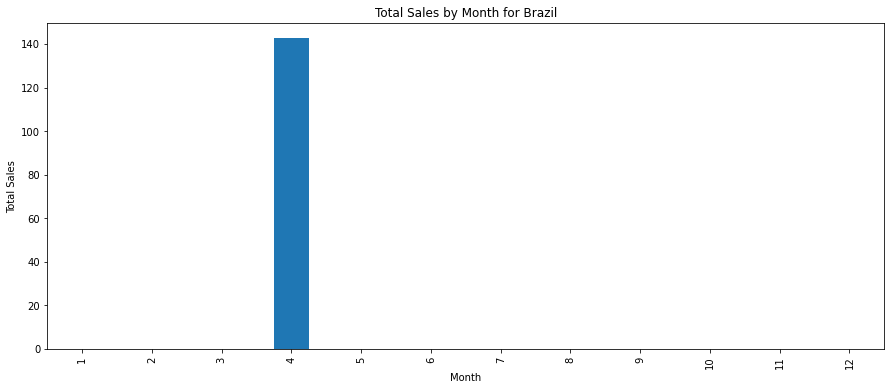

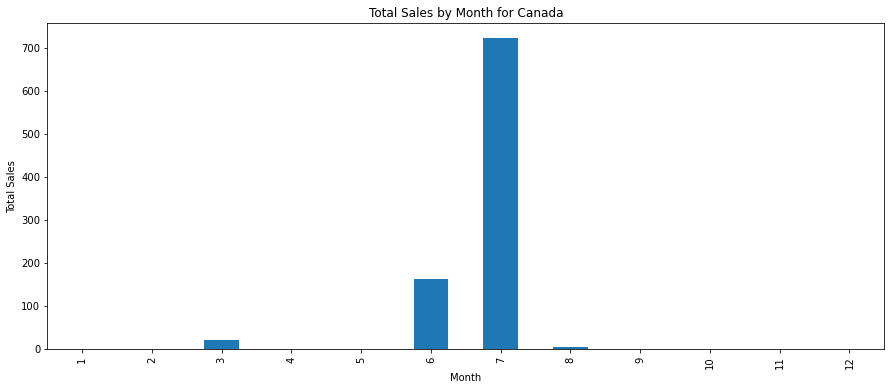

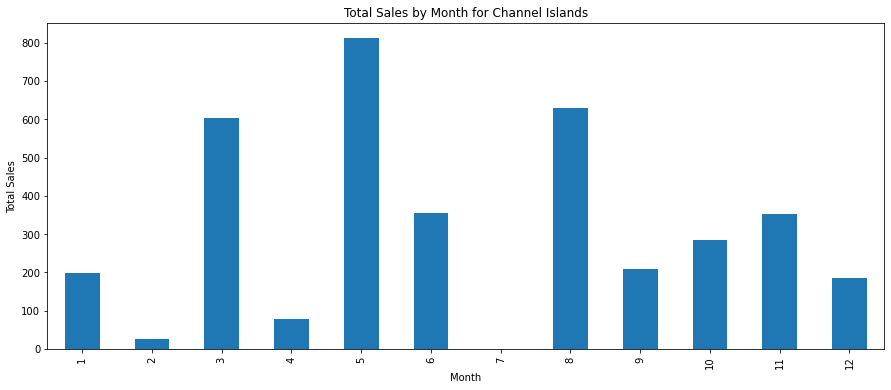

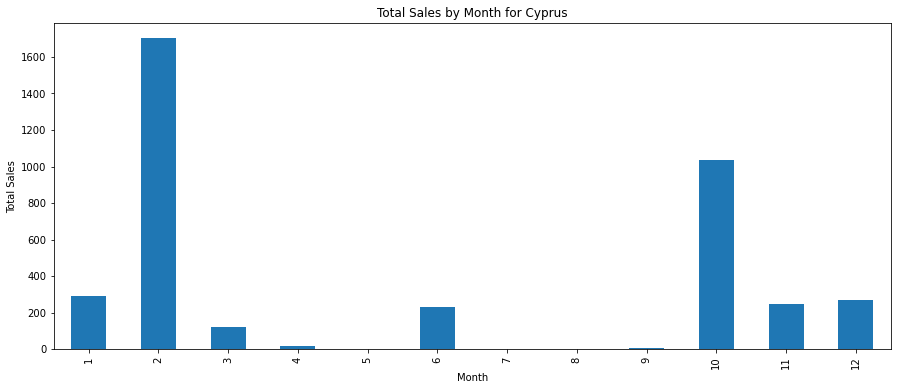

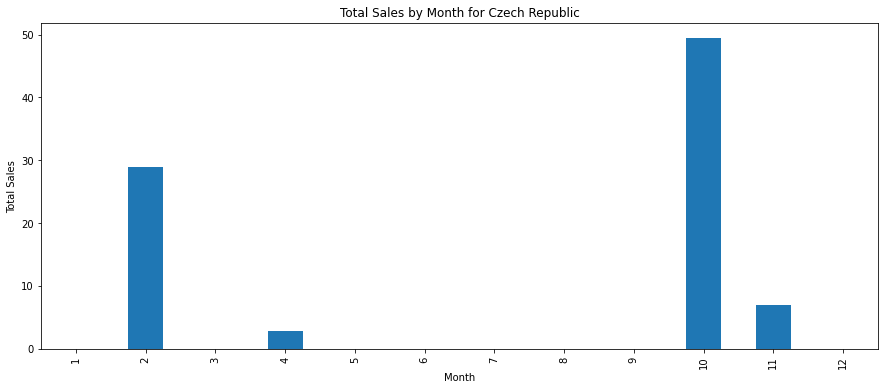

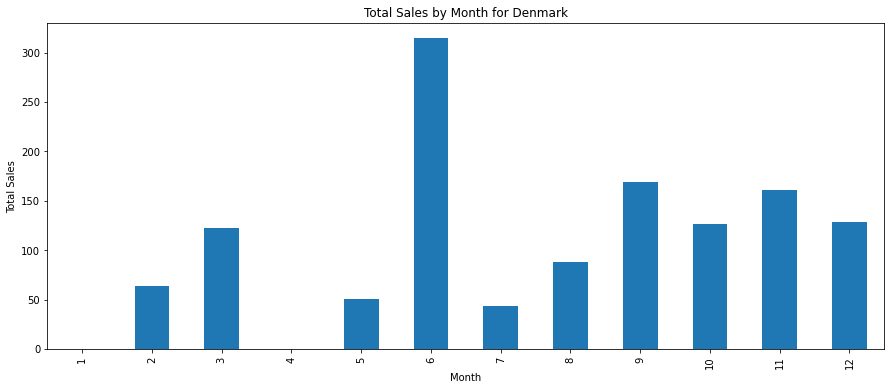

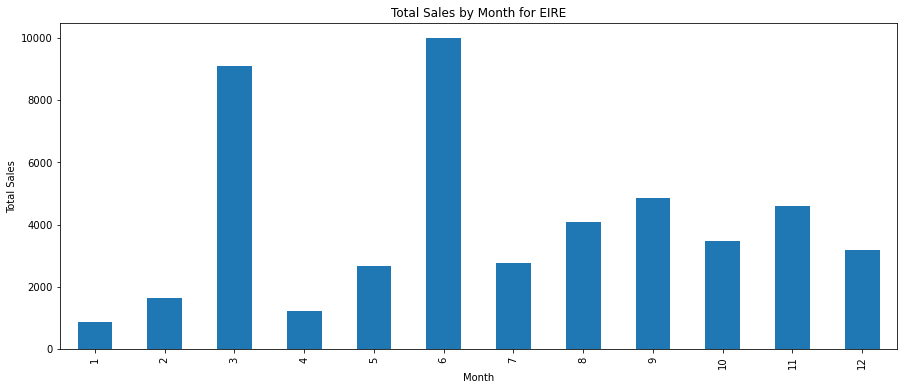

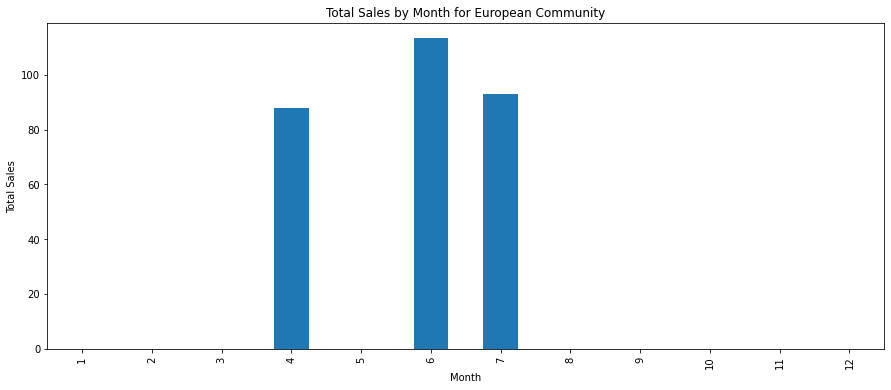

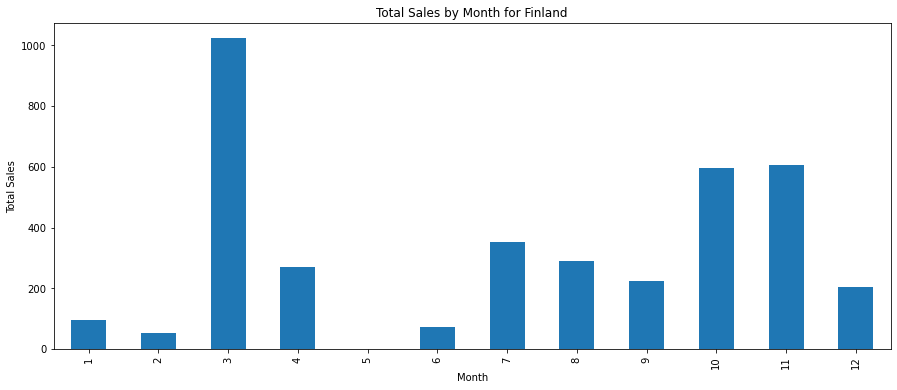

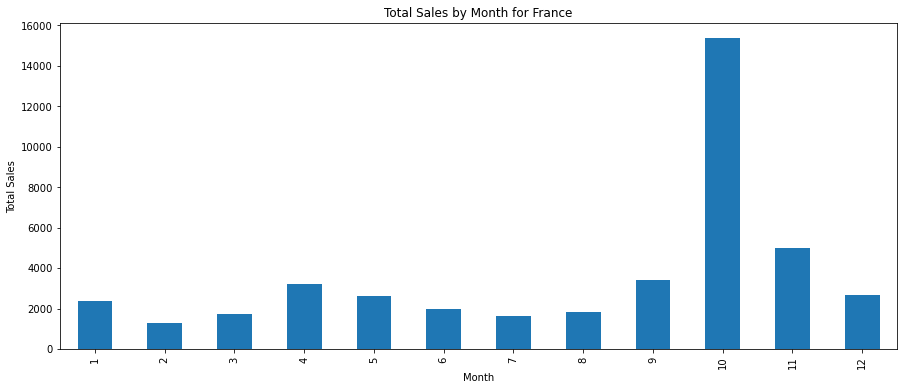

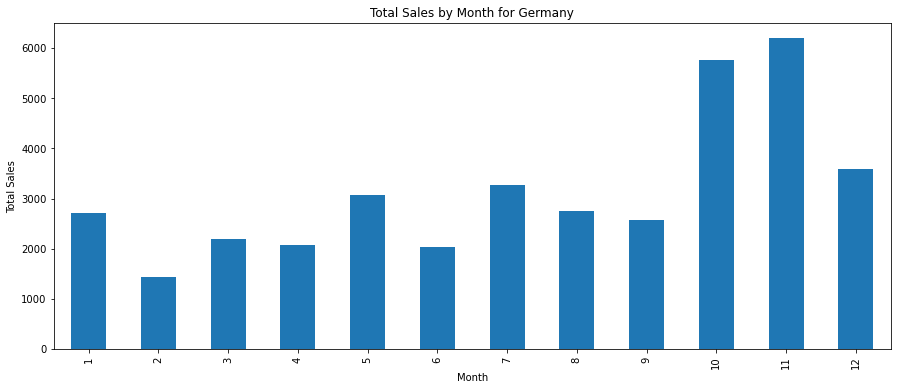

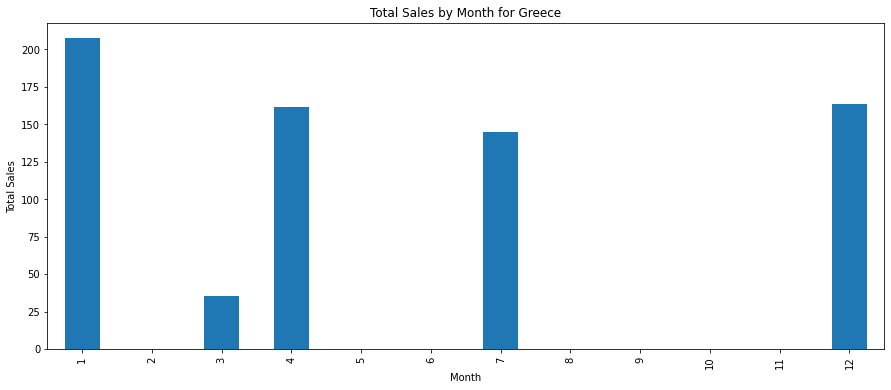

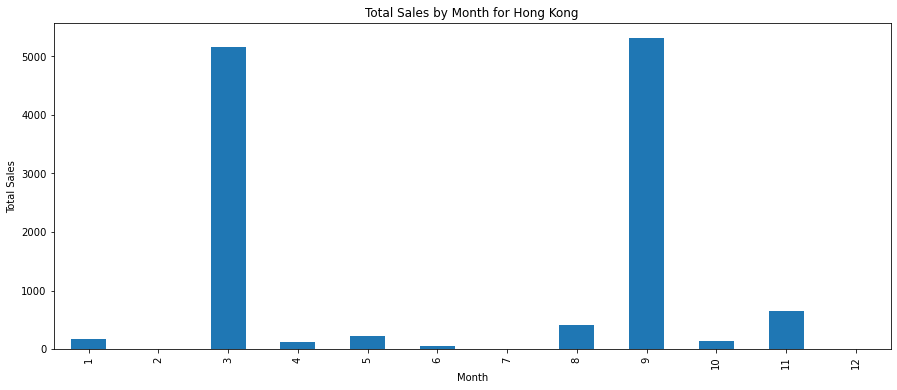

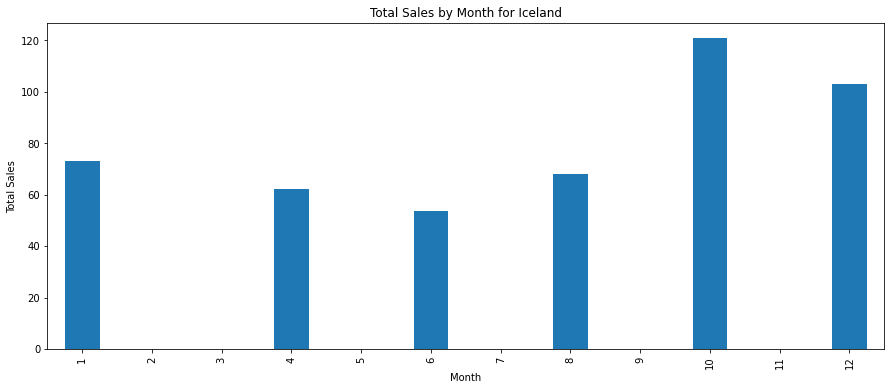

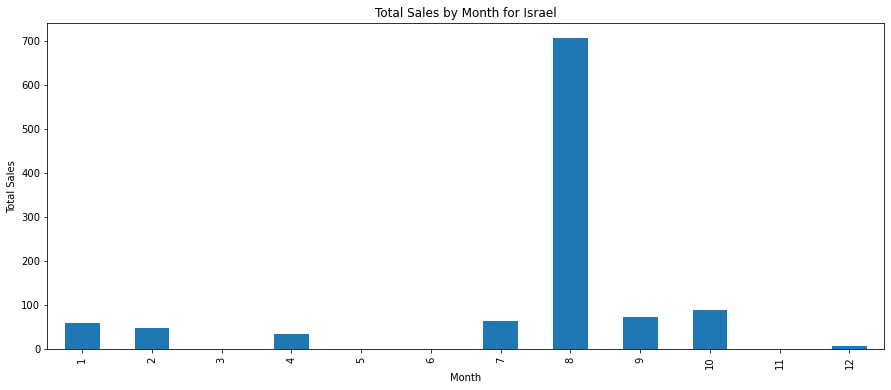

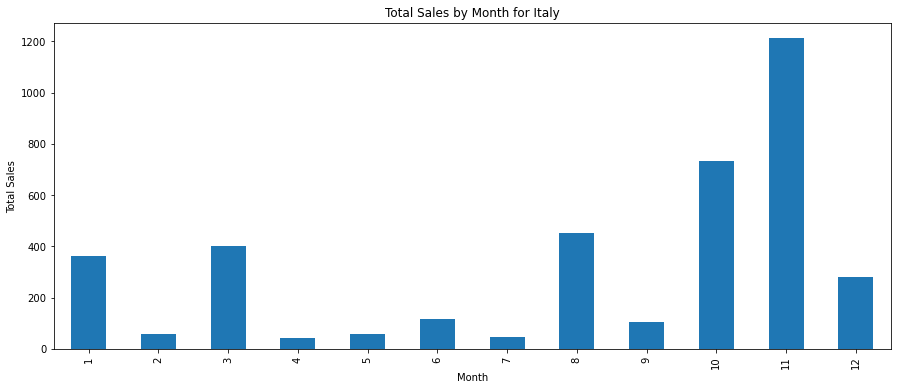

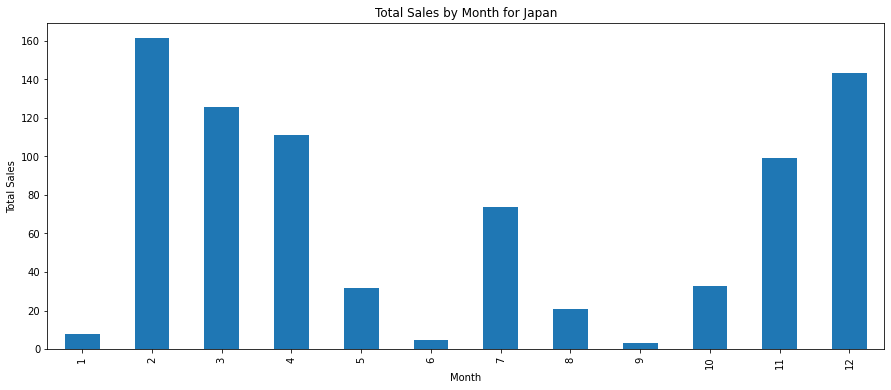

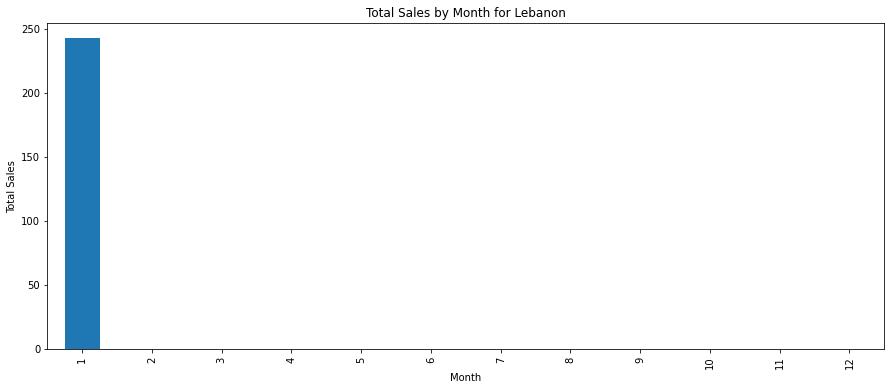

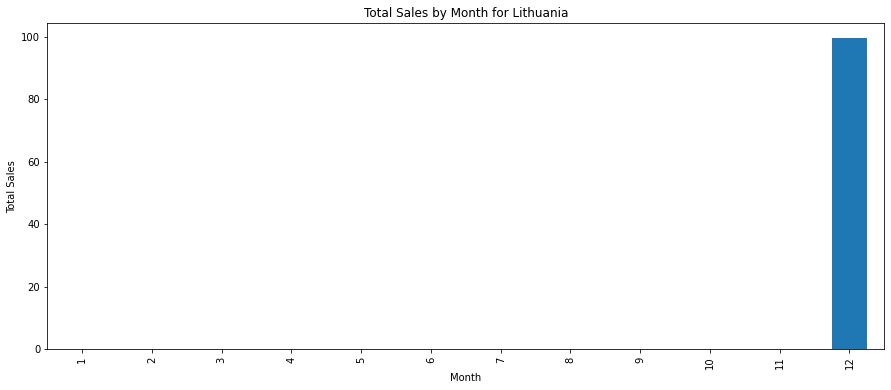

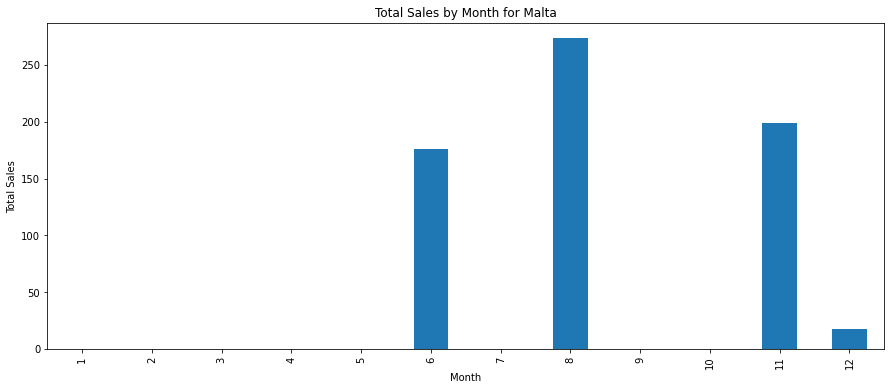

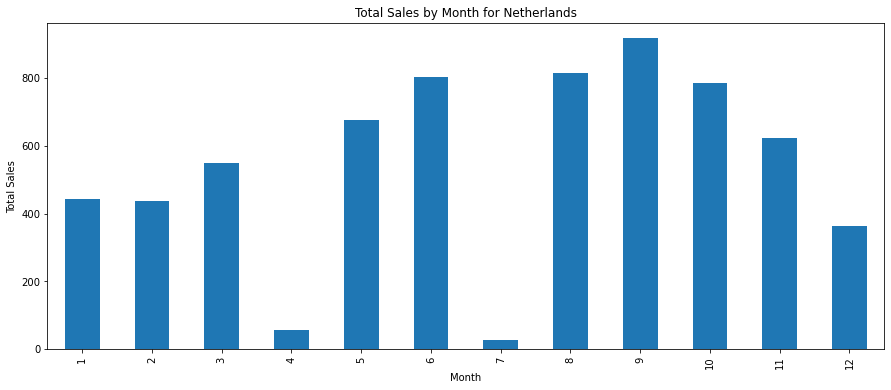

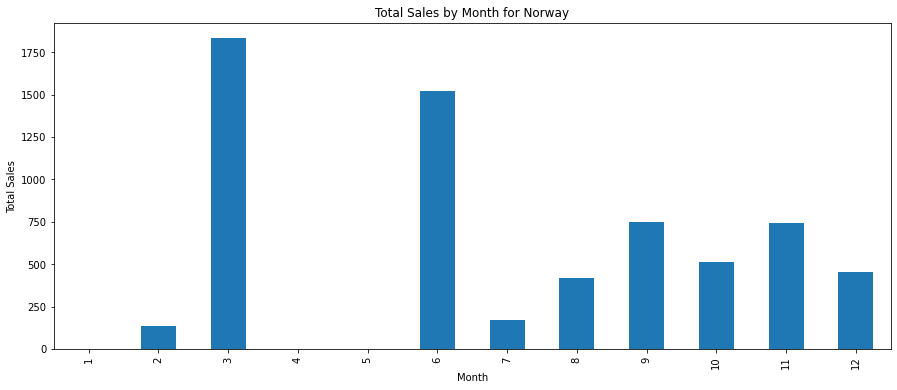

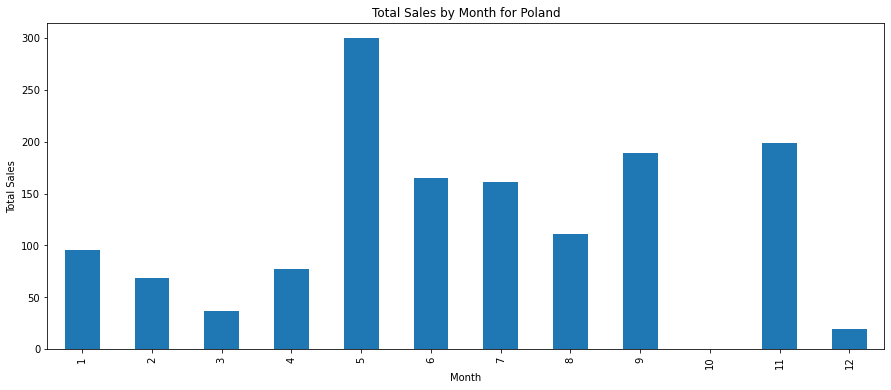

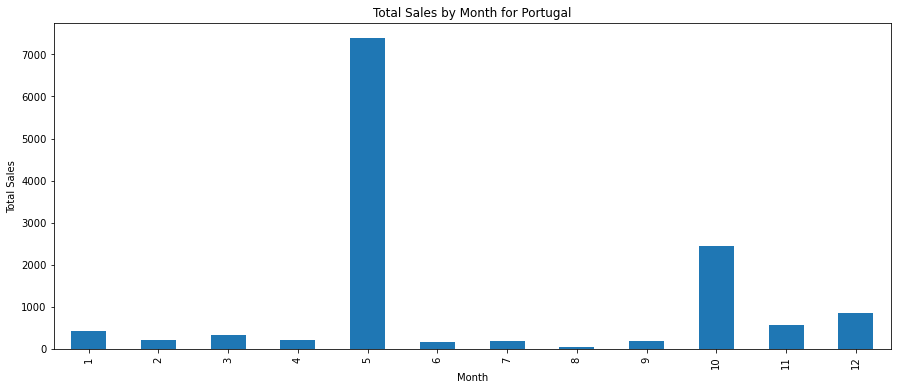

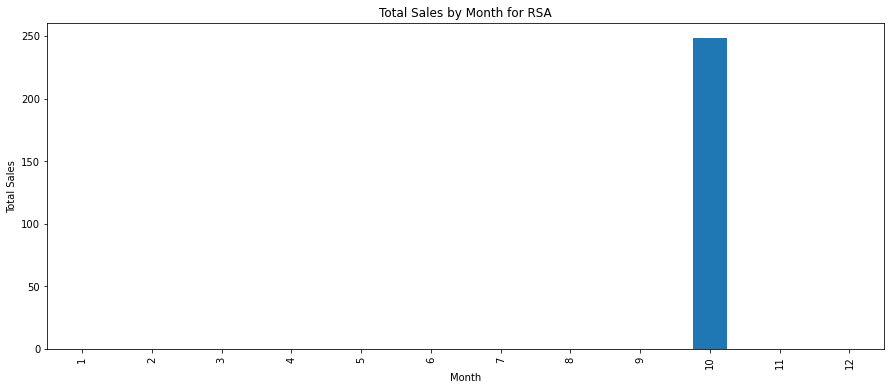

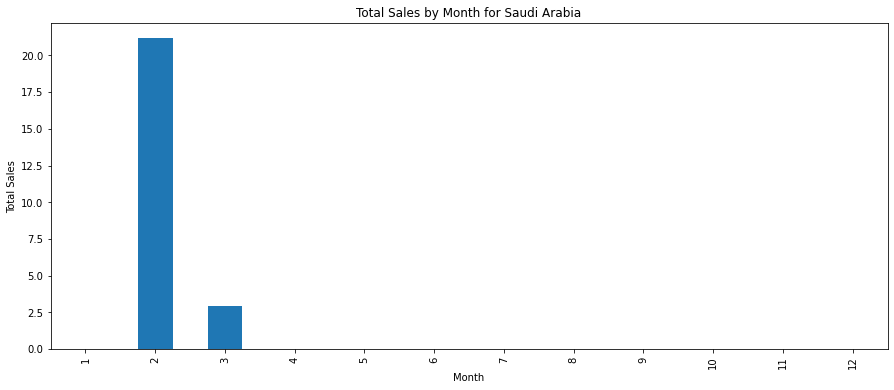

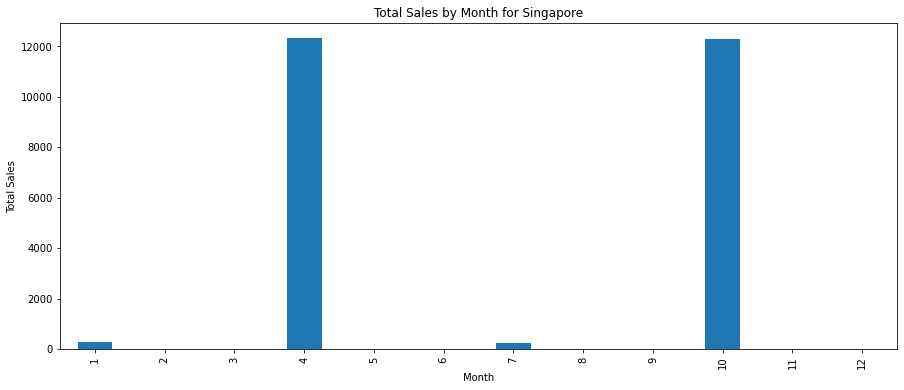

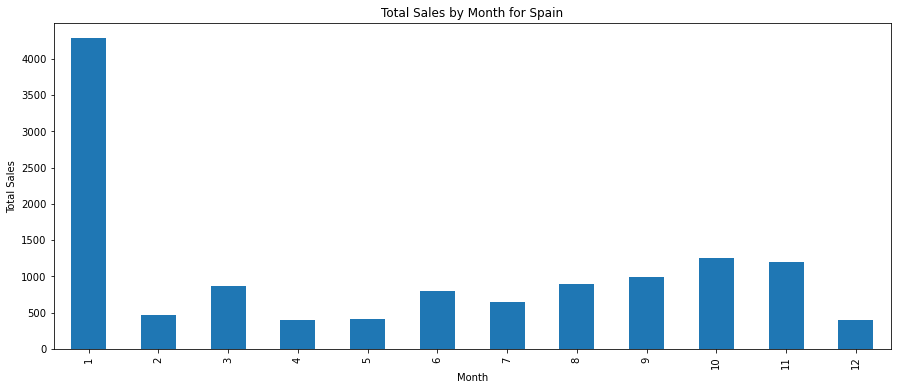

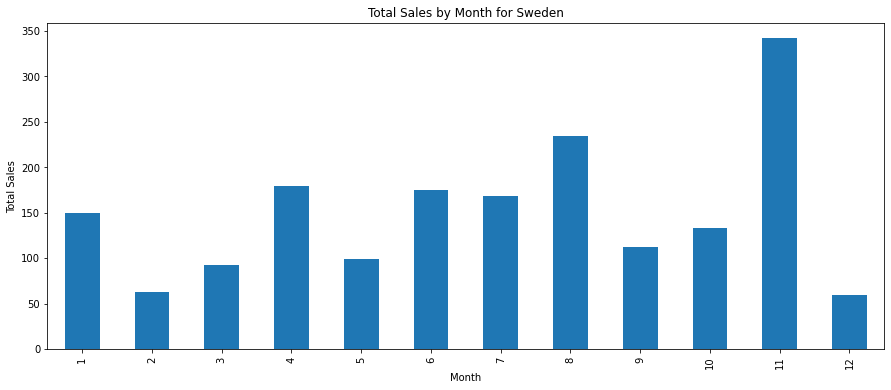

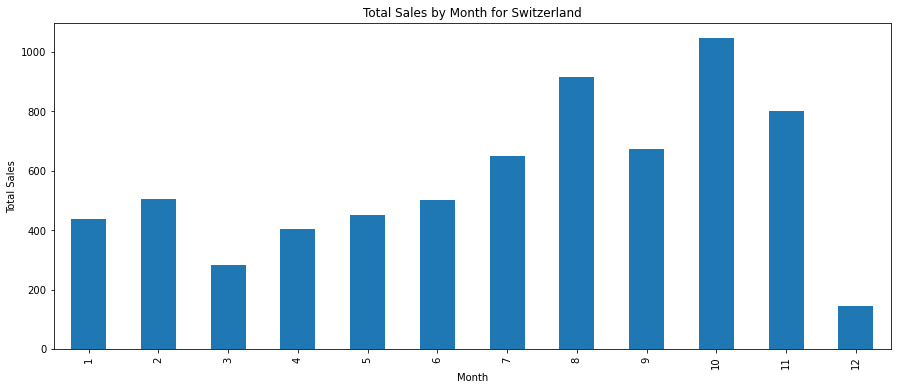

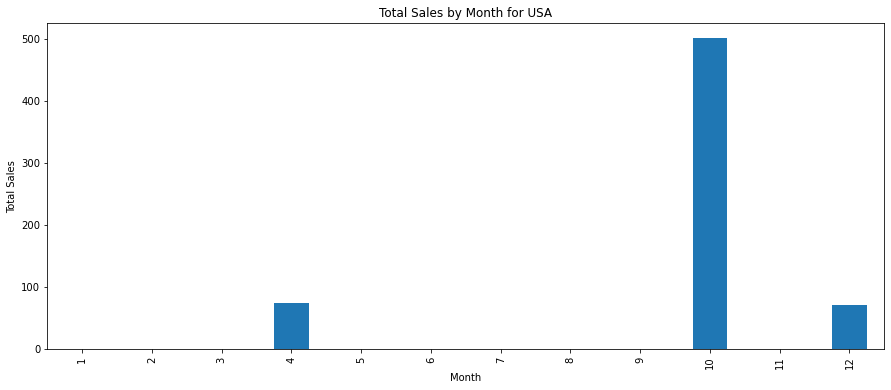

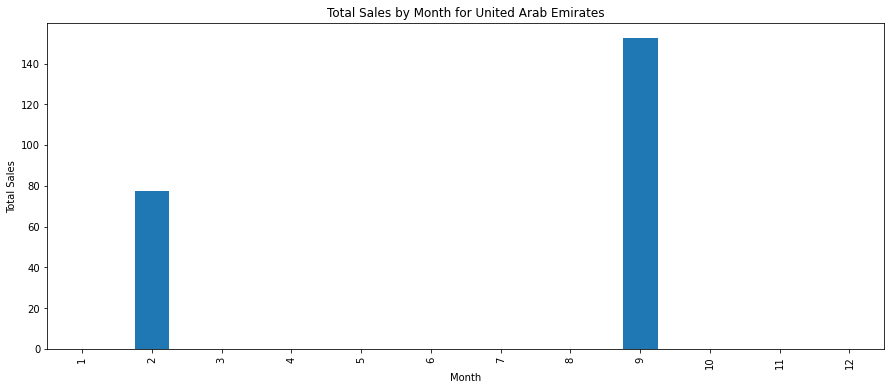

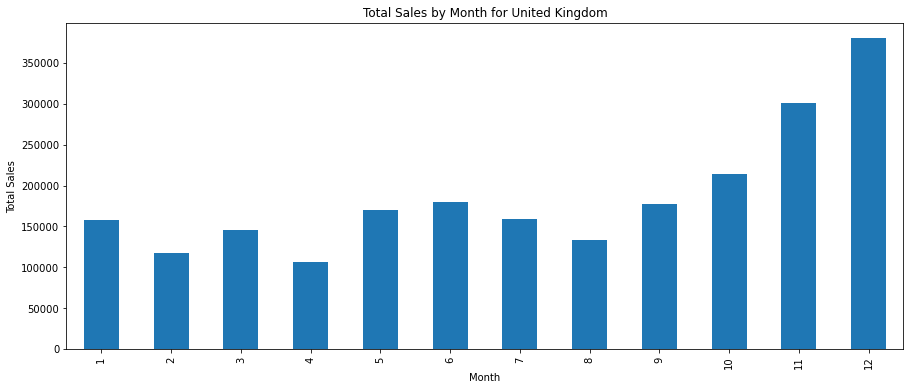

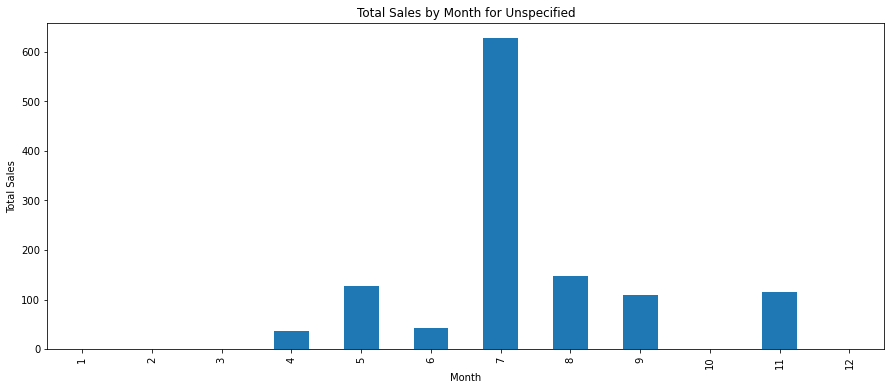

In [40]:
# Создание графиков для каждой страны
for country in sales_by_country_month.index:
    sales_by_country_month.loc[country].plot(kind="bar", figsize=(15, 6))
    plt.title(f"Total Sales by Month for {country}")
    plt.ylabel("Total Sales")
    plt.show() 

Обратим внимание на частоту покупок из месяца в месяц в богатых странах и в бедных странах: в богатых мы видим регулярные покупки, а в бедных - 1 - 2 месяца в год.

# 10 стран с самыми маленькими суммами продаж за все время:

In [14]:
# Группировка данных по странам и суммирование продаж
total_sales_by_country = df.groupby("Country")["UnitPrice"].sum()

# Сортировка по сумме продаж и выбор 10 стран с наименьшими продажами
lowest_sales_countries = total_sales_by_country.nsmallest(10)

print(lowest_sales_countries)

Country
Saudi Arabia             24.11
Bahrain                  86.57
Czech Republic           88.15
Lithuania                99.44
Brazil                  142.60
United Arab Emirates    229.89
Lebanon                 242.44
RSA                     248.10
European Community      294.05
Iceland                 481.21
Name: UnitPrice, dtype: float64


Выведем топ стран-аутсайдеров по продажам. Сюда попала: Бразилия, Бахрейн, Чешская Республика и т.д.

# Подсчет продаж по ID покупателя:

In [22]:
# Продажи по ID покупателя по месяцам и годам
sales_by_customer_month_year = df.groupby(['CustomerID', df['InvoiceDate'].dt.to_period('M')]).sum()['UnitPrice']

print(sales_by_customer_month_year)

CustomerID  InvoiceDate
12346.0     2011-01          2.08
12347.0     2010-12         89.59
            2011-01         73.17
            2011-04         62.29
            2011-06         53.62
                            ...  
18283.0     2011-10         83.48
            2011-11        318.76
            2011-12         65.38
18287.0     2011-05         56.92
            2011-10         47.63
Name: UnitPrice, Length: 13675, dtype: float64


<AxesSubplot:xlabel='CustomerID,InvoiceDate'>

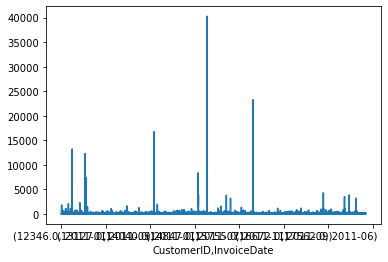

In [25]:
# Создание графика
sales_by_customer_month_year.plot()

Проанализируем объем продаж в разрезе ID покупателей. На основе данных можем сгруппировать айдишки по нескольким группам: высокий уровень дохода, средний и низкий и проработать программу работы с каждой группой в индивидуальном режиме с целью повышения продаж в будущем. Здесь можно отфильтровать продажи по году или по месяцам. По желанию можно исследовать динамику среднего чека на каждого клиента в разрезе месяца, года и выделить когорты.

In [26]:
# Сумма продаж по каждому покупателю за все время
total_sales_by_customer = df.groupby('CustomerID').sum()['UnitPrice']

print(total_sales_by_customer)

CustomerID
12346.0       2.08
12347.0     481.21
12348.0     178.71
12349.0     605.10
12350.0      65.30
            ...   
18280.0      47.65
18281.0      39.36
18282.0      62.68
18283.0    1220.93
18287.0     104.55
Name: UnitPrice, Length: 4372, dtype: float64


<AxesSubplot:xlabel='CustomerID'>

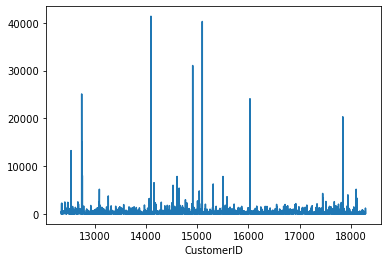

In [27]:
# Создание графика
total_sales_by_customer.plot()

Выведем топовые ID клиентов по продажам за все время. 

# Cредняя стоимость покупки по месяцам для каждого ID покупателя (средний чек для каждого покупаеля):

In [35]:
# Группировка данных по ID покупателя и месяцу, расчет средней стоимости покупки
avg_price_per_month = df.groupby(['CustomerID', 'Month'])['TotalPrice'].mean().reset_index()

print(avg_price_per_month)

       CustomerID  Month  TotalPrice
0         12346.0      1    0.000000
1         12347.0      1   16.392759
2         12347.0      4   26.510417
3         12347.0      6   21.251111
4         12347.0      8   26.586818
...           ...    ...         ...
13410     18283.0     10    2.866250
13411     18283.0     11    2.975160
13412     18283.0     12    4.160000
13413     18287.0      5   26.388966
13414     18287.0     10   26.146341

[13415 rows x 3 columns]


Рассчитаем чек на каждый ID покупателя в разрезе месяца.

# Сумма покупок для каждого ID покупателя (LTV):

In [58]:
# 1. Общая средняя стоимость покупки
average_purchase_price = df['UnitPrice'].mean()

# 2. Среднее количество месяцев, в которых покупатели совершают покупки

# Группировка данных по покупателю
grouped_df = df.groupby('CustomerID')

# Функция для расчета разницы в месяцах между минимальной и максимальной датой покупки
def calculate_months(row):
    min_date = row['InvoiceDate'].min()
    max_date = row['InvoiceDate'].max()
    months_diff = (max_date.year - min_date.year) * 12 + max_date.month - min_date.month
    return months_diff

# Применение функции к каждой группе
months_diff = grouped_df.apply(calculate_months)

# Расчет среднего количества месяцев
average_months = months_diff.mean()

# 3. Умножить среднюю стоимость покупки на среднее количество месяцев
result_ltv = average_purchase_price * average_months

print("Средняя стоимость покупки:", average_purchase_price)
print("Среднее количество месяцев, в которые покупатели совершают покупки:", average_months)
print("LTV:", result_ltv)

Средняя стоимость покупки: 4.611113626083471
Среднее количество месяцев, в которые покупатели совершают покупки: 4.360704483074108
LTV: 20.107703861226298


In [36]:
# Группировка данных по ID покупателя, расчет суммы покупок
total_purchase = avg_price_per_month.groupby('CustomerID')['TotalPrice'].sum().reset_index()

# Расчет количества месяцев для каждого покупателя
num_months = avg_price_per_month['CustomerID'].value_counts().reset_index()
num_months.columns = ['CustomerID', 'NumMonths']

# Объединение таблиц и расчет общей суммы покупок
total_purchase = pd.merge(total_purchase, num_months, on='CustomerID')
total_purchase['TotalPurchase'] = total_purchase['TotalPrice'] * total_purchase['NumMonths']

print(total_purchase)

      CustomerID  TotalPrice  NumMonths  TotalPurchase
0        12346.0    0.000000          1       0.000000
1        12347.0  140.580066          6     843.480396
2        12348.0  267.157647          4    1068.630588
3        12349.0   24.076027          1      24.076027
4        12350.0   19.670588          1      19.670588
...          ...         ...        ...            ...
4367     18280.0   18.060000          1      18.060000
4368     18281.0   11.545714          1      11.545714
4369     18282.0   27.913000          2      55.826000
4370     18283.0   28.054222         10     280.542219
4371     18287.0   52.535307          2     105.070614

[4372 rows x 4 columns]


Мы рассчитали LTV. Но, к сожалению, мы не можем точно сказать, в норме данный показатель или нет, т.к. мы не владеем данными по затратам на привлечение клиентов. Как правило, нормальный показатель должен быть в три раза выше затрат на привлечение клиента.

# Прогноз продаж за первый квартал 2012 года на основе данных по продажам за 2011 год:

In [40]:
# Фильтрация данных по продажам за первые три месяца 2011 года
sales_2011 = df[(df['InvoiceDate'].dt.year == 2011) & (df['InvoiceDate'].dt.month <= 3)]

# Группировка данных по месяцам и расчет суммы продаж
monthly_sales = sales_2011.groupby(sales_2011['InvoiceDate'].dt.month)['UnitPrice'].sum()

# Прогноз суммы продаж за каждый месяц первого квартала 2012 года
forecast_2012 = monthly_sales.mean() * 3

print(f"Прогноз суммы продаж за каждый месяц первого квартала 2012 года: {forecast_2012}")

Прогноз суммы продаж за каждый месяц первого квартала 2012 года: 471688.0800000001
